<a href="https://colab.research.google.com/github/Davron030901/Numpy/blob/main/ARRAY_PROPERTIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --upgrade google-colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.8 MB/s eta 0:00:00


In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from PIL import Image as PILImage
import io

def get_camera_image():
  js = Javascript('''
    async function getCameraImage() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture Image';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for button to click
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    ''')
  display(js)
  data = eval_js('getCameraImage()')
  return data

try:
  # This will prompt you to grant camera access and then show a 'Capture Image' button.
  # Click the button to take a photo
  base64_image_data = get_camera_image()
  if base64_image_data:
    # Decode the base64 string to binary data
    binary_image_data = b64decode(base64_image_data.split(',')[1])
    # Open the image using PIL and convert to a NumPy array
    camera_image = np.array(PILImage.open(io.BytesIO(binary_image_data)))
    print("Camera image captured and stored in 'camera_image' variable.")
  else:
    print("No image data captured.")
except Exception as err:
  print(f"An error occurred: {err}")
  print("Failed to capture image. Please ensure you have a webcam and grant access.")

<IPython.core.display.Javascript object>

Camera image captured and stored in 'camera_image' variable.


In [9]:
# Upload the image
img=camera_image

print(img.shape)
print(img.size)
print(img.dtype)
print(img.nbytes)

(480, 640, 3)
921600
uint8
921600


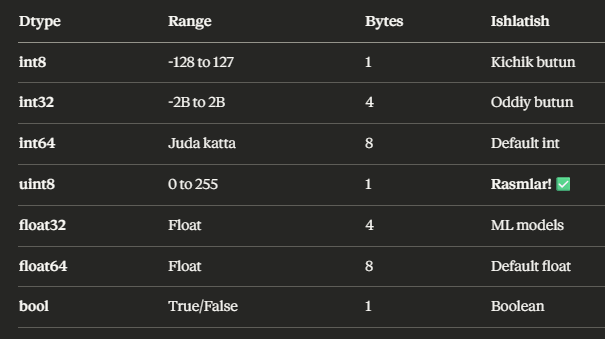

#Basic Properties

shape = o'lcham, tuple shaklida

size = jami elementlar soni

ndim = necha o'lchamli (1D, 2D, 3D, ...)

dtype = data type (int, float, etc.)

itemsize = bitta element hajmi (bytes)

nbytes = jami xotira (bytes)

In [11]:
import numpy as np

#Simple 1D array
arr_1d=np.array([1,2,3,4,5])

print("1D ARRAY:")
print("Array:",arr_1d)
print("Shape:",arr_1d.shape)
print("Size:",arr_1d.size)
print("Ndim:",arr_1d.ndim)
print("Dtype:",arr_1d.dtype)
print("Itemsize:",arr_1d.itemsize)
print("Nbytes",arr_1d.nbytes)

1D ARRAY:
Array: [1 2 3 4 5]
Shape: (5,)
Size: 5
Ndim: 1
Dtype: int64
Itemsize: 8
Nbytes 40


#2D Array Properties

In [12]:
arr_2d=np.array([[1,2,3,4],
                 [5,6,7,8],
                 [9,10,11,12]])

print("2D ARRAY:")
print("Array:",arr_2d)
print("Shape:",arr_2d.shape)
print("Size:",arr_2d.size)
print("Ndim:",arr_2d.ndim)
print("Dtype:",arr_2d.dtype)
print("Itemsize:",arr_2d.itemsize)
print("Nbytes",arr_2d.nbytes)

# Separately extract the shape
row,cols=arr_2d.shape
print("Rows:",row)
print("Columns:",cols)

2D ARRAY:
Array: [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape: (3, 4)
Size: 12
Ndim: 2
Dtype: int64
Itemsize: 8
Nbytes 96
Rows: 3
Columns: 4


#3D Array (Pictures!)

3D array - RGB image simulation

100x100 pixels, 3 channels (R, G, B)

In [13]:
img=np.zeros((100,100,3))

print("3D ARRAY (RGB image):")
print("Array:",img)
print("Shape:",img.shape)
print("Size:",img.size)
print("Ndim:",img.ndim)
print("Dtype:",img.dtype)
print("Itemsize:",img.itemsize)
print("Nbytes",img.nbytes)

#Separate shape
height,width,chennels=img.shape
print(f"\nBo'yi (height): {height} px")
print(f"Eni (width): {width} px")
print(f"Kanal (chennels): {chennels}")

3D ARRAY (RGB image):
Array: [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
Shape: (100, 100, 3)
Size: 30000
Ndim: 3
Dtype: float64
Itemsize: 8
Nbytes 240000

Bo'yi (height): 100 px
Eni (width): 100 px
Kanal (chennels): 3


#Data Types (dtype)

 INT32: 4 bytes per element

 FLOAT64: 8 bytes per element

 UINT8: 1 byte per element

In [15]:
arr_int=np.array([1,2,3],dtype=np.int32)
arr_float=np.array([1.0,2.0,3.0],dtype=np.float64)
#unsigned integer 8 bit
arr_uint8=np.array([100,200,255],dtype=np.uint8)

print("INT32:")
print("Dtype:",arr_int.dtype)
print("Itemsize:",arr_int.itemsize)
print("Nbytes:",arr_int.nbytes)

print("\n FLOAT64")
print("Dtype:",arr_float.dtype)
print("Itemsize:",arr_float.itemsize)
print("Nbytes:",arr_float.nbytes)

print("\n UINT8 (FOR IMAGES)")
print("Dtype:",arr_uint8.dtype)
print("Itemsize:",arr_uint8.itemsize)
print("Nbytes:",arr_uint8.nbytes)

INT32:
Dtype: int32
Itemsize: 4
Nbytes: 12

 FLOAT64
Dtype: float64
Itemsize: 8
Nbytes: 24

 UINT8 (FOR IMAGES)
Dtype: uint8
Itemsize: 1
Nbytes: 3


1000x1000 rasm:

float64: 1M * 8 bytes = 8 MB

uint8:   1M * 1 byte  = 1 MB  ← 8x kam! ✅

#Real-world Image Example

In [17]:
hd_image=np.zeros((1080,1920,3),dtype=np.uint8)

print("HD RGB IMAGE:")
print(f"Shape: {hd_image.shape}")
print(f"Resolution: {hd_image.shape[0]}x{hd_image.shape[1]}")
print(f"Channels: {hd_image.shape[2]}")
print(f"Total pixels: {hd_image.size:,}")
print(f"Dtype: {hd_image.dtype}")
print(f"Itemsize: {hd_image.itemsize} bytes")
print(f"Memory: {hd_image.nbytes:,} bytes")
print(f"Memory: {hd_image.nbytes/(1024*1024):.2f} MB")

HD RGB IMAGE:
Shape: (1080, 1920, 3)
Resolution: 1080x1920
Channels: 3
Total pixels: 6,220,800
Dtype: uint8
Itemsize: 1 bytes
Memory: 6,220,800 bytes
Memory: 5.93 MB


Create a 1D array and print all properties

In [19]:
arr1=np.array([10,20,30,40,50,60])
print("Array 1D:",arr1)
print("Shape:",arr1.shape)
print("Size:",arr1.size)
print("Ndim:",arr1.ndim)
print("Dtype:",arr1.dtype)
print("Itemsize:",arr1.itemsize)
print("Nbytes:",arr1.nbytes)

Array 1D: [10 20 30 40 50 60]
Shape: (6,)
Size: 6
Ndim: 1
Dtype: int64
Itemsize: 8
Nbytes: 48


5x5 matrix, print all properties

In [20]:
arr2=np.arange(25).reshape(5,5)
print("Array 2D:",arr2)
print("Shape:",arr2.shape)
print("Siza:",arr2.size)
print("Ndim:",arr2.ndim)
print("Dtype:",arr2.dtype)
print("Itemsize:",arr2.itemsize)
print("Nbytes:",arr2.nbytes)

rows,cols=arr2.shape
print("Rows:",rows)
print("Columns:",cols)

Array 2D: [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Shape: (5, 5)
Siza: 25
Ndim: 2
Dtype: int64
Itemsize: 8
Nbytes: 200
Rows: 5
Columns: 5


50x50 grayscale image (uint8)

In [37]:
gray_img=np.zeros((50,50),dtype=np.uint8)

print("Gray image")
print("Shape:",gray_img.shape)
print("Size:",gray_img.size)
print(f"Memory:{gray_img.nbytes:,} bytes")

Gray image
Shape: (50, 50)
Size: 2500
Memory:2,500 bytes


200x200x3 RGB image (uint8)

Resolution, channels, total pixels, memory (MB)

In [31]:
rgb_img=np.zeros((200,200,3),dtype=np.uint8)

print("RGB image")
print(f"Resolution: {rgb_img.shape[0]}x{rgb_img.shape[1]}")
print(f"Channels: {rgb_img.shape[2]}")
print(f"Total pixels:{rgb_img.size:,}")
print(f"Memory: {rgb_img.nbytes/(1024*1024):.2f} MB")

RGB image
Resolution: 200x200
Channels: 3
Total pixels:120,000
Memory: 0.11 MB


4K image (3840x2160x3) uint8

In [35]:
img_4k=np.zeros((2160,3840,3),dtype=np.uint8)

print(f"Memory: {img_4k.nbytes/(1024*1024):.2f} MB")
print(f"Memory: {img_4k.nbytes/(1024*1024*1024):.3f} GB")


Memory: 23.73 MB
Memory: 0.023 GB


 1. float64 (1000 elementli)
 2. uint8 (1000 elementli)

Calculate the memory difference

In [47]:
arr_float=np.zeros(1000,dtype=np.float64)
arr_uint=np.zeros(1000,dtype=np.uint8)

print(f"Memory difference: {arr_float.nbytes-arr_uint.nbytes:,} bytes")

Memory difference: 7,000 bytes


10x10x10x3 array (4D!)

In [48]:
arr_4d=np.zeros((10,10,10,3))

print("4D ARRAY")
print(f"Shape: {arr_4d.shape}")
print(f"Size: {arr_4d.size:,}")
print(f"Ndim: {arr_4d.ndim}")
print(f"Memory: {arr_4d.nbytes:,} bytes")

4D ARRAY
Shape: (10, 10, 10, 3)
Size: 3,000
Ndim: 4
Memory: 24,000 bytes


Shape unpacking

In [49]:
height,width,depth,channels=arr_4d.shape

print(f"Height: {height}")
print(f"Width: {width}")
print(f"Depth: {depth}")
print(f"Channels: {channels}")

Height: 10
Width: 10
Depth: 10
Channels: 3


Memory check

In [ ]:
size_mb=arr_4d.nbytes/(1024*1024)
if size_mb>100:
  print(f"Warning: {size_mb:.2f} MB")
else:
  print(f"Size: {size_mb:.2f} KB")

dtype conversion

In [57]:
img_float=np.random.rand(100,100)*255
img_uint8=img_float.astype(np.uint8)
print(img_float.dtype)
print(img_uint8.dtype)
print(f"Memory differense (float/uint): {int(img_float.nbytes/img_uint8.nbytes)}x tez")

float64
uint8
Memory differense (float/uint): 8x
